In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')
# sex F(0) 591 M(1) 453
# famsize GT3(0) 738 LE3(1) 306
# Pstatus A(0) 121 T(1) 923
# Mjob at_home(0) 194 health(1) 82 other(2) 399 service(3) 239 teacher(4) 130
# Fjob at_home(0) 62 health(1) 41 other(2) 584 service(3) 292 teacher(4) 65
# higher yes(1) 955 no(0) 89
# romantic yes(1) 371 no(0) 673

In [5]:
from sklearn.preprocessing import OrdinalEncoder
columns_name = ['sex', 'famsize', 'Pstatus', 'higher', 'romantic']
encoder = OrdinalEncoder()
df[columns_name] = encoder.fit_transform(df[columns_name])

In [6]:
selected_columns = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Dalc', 'Walc']
df = df[selected_columns].copy()

In [7]:
df['Dalc'] = df['Dalc'].astype(str)
print(df.dtypes)
df.to_csv('df.csv')

sex        float64
age          int64
Pstatus    float64
famrel       int64
Medu         int64
Mjob        object
Fedu         int64
Fjob        object
goout        int64
health       int64
Dalc        object
Walc         int64
dtype: object


In [8]:
X = df[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])

yD = df['Dalc']
yW = df['Walc']
X.columns

Index(['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher'],
      dtype='object')

In [9]:
'''
from sklearn.utils import Bunch

dataset = {
    'data': X,
    'target': yD,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu',
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}

bunch = Bunch(**dataset)

X = bunch.data
y = bunch.target

feature_names = bunch.feature_names
class_names = bunch.target_names'''

"\nfrom sklearn.utils import Bunch\n\ndataset = {\n    'data': X,\n    'target': yD,\n    'DESCR': 'Student alcohol consumption during weekday',\n    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu',\n                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',\n                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],\n    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],\n}\n\nbunch = Bunch(**dataset)\n\nX = bunch.data\ny = bunch.target\n\nfeature_names = bunch.feature_names\nclass_names = bunch.target_names"

In [10]:
X.columns

Index(['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher'],
      dtype='object')

In [11]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import linear_model

selected = X[list(X.columns)]
interestCols = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health'
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']
'''
names = pd.DataFrame(X.columns)
clf = linear_model.LinearRegression()

rfe_mod = RFECV(clf, cv=5, step=1)
selected_features = rfe_mod.fit(X,yW) 

feature_rank = pd.DataFrame(selected_features.ranking_)

ranked = pd.concat([names,feature_rank], axis=1)
ranked.columns = ["Feature", "Rank"]

ranked'''

'\nnames = pd.DataFrame(X.columns)\nclf = linear_model.LinearRegression()\n\nrfe_mod = RFECV(clf, cv=5, step=1)\nselected_features = rfe_mod.fit(X,yW) \n\nfeature_rank = pd.DataFrame(selected_features.ranking_)\n\nranked = pd.concat([names,feature_rank], axis=1)\nranked.columns = ["Feature", "Rank"]\n\nranked'

In [2]:
# Importing modules and libraries for our modeling
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
clf = linear_model.LogisticRegression(max_iter=3000)
sfs = SequentialFeatureSelector(clf, n_features_to_select=10, scoring='accuracy', cv=None)
features = sfs.fit(X,yD)

X_train, X_test, y_train, y_test = train_test_split(features.transform(X), yD, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred)) #0.7416267942583732

In [ ]:
clf = linear_model.LogisticRegression(max_iter=3000)
sfs = SequentialFeatureSelector(clf, n_features_to_select=10, scoring='accuracy', cv=None)
features = sfs.fit(X,yW)

#X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features.transform(X), yW, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(y_pred)
print(accuracy_score(y_test, y_pred)) #0.4784688995215311
print(f1_score(y_test, y_pred))

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(selected, yD, test_size=0.2, random_state=49)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='micro'))

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred)) 
print(f1_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))

In [49]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['poly', 'rbf']}

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, refit=True, verbose=3)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_estimator_)

KeyboardInterrupt: 

In [28]:
model = XGBClassifier(n_estimators=300, max_depth=12, max_leaves=0, learning_rate=0.05, objective='multi:softmax', booster='gbtree', colsample_bytree=1, min_child_weight=1)

X_train, X_test, y_train, y_test = train_test_split(selected, yD, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)
print(accuracy_score(y_test, y_pred)) #0.861244019138756

0.861244019138756


In [30]:
model = XGBClassifier(n_estimators=200, max_depth=9, max_leaves=0, learning_rate=0.05, objective='multi:softmax', booster='gbtree', colsample_bytree=1, min_child_weight=1)

X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=42)
# Transform the labels [1,2,3,4,5] to [0,1,2,3,4] in order to fit the model
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)
accuracy_score(y_test, y_pred) #0.722488038277512

0.722488038277512

<Axes: >

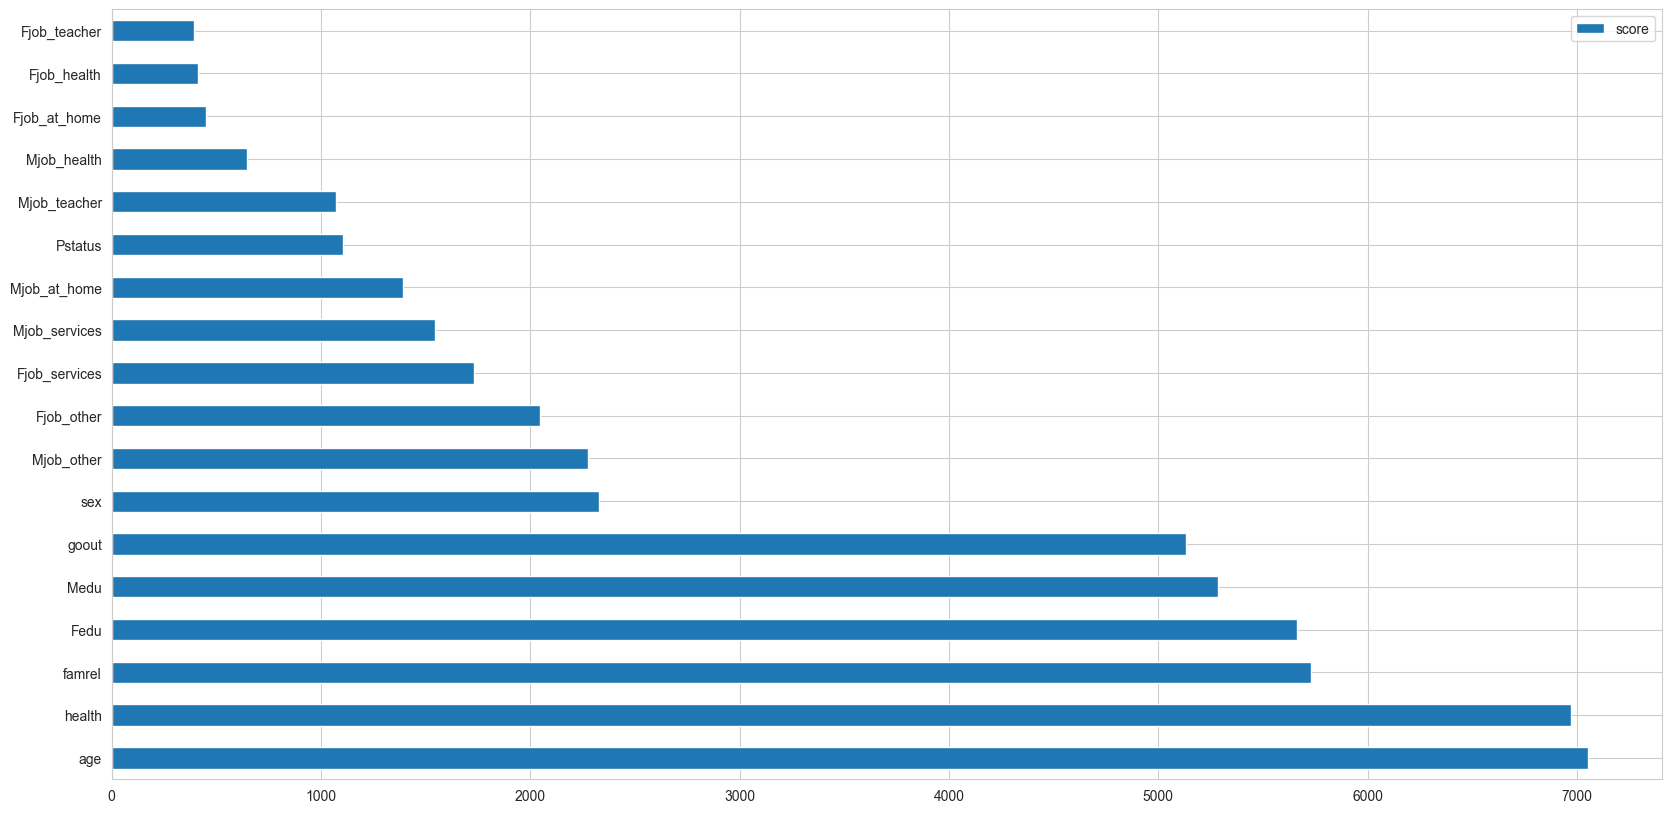

In [31]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [79]:
# Use Grid Search CV to find the best parameters for xgboost model
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

xgbc = XGBClassifier()
y_train = le.fit_transform(y_train)
#clf = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
grid_search = GridSearchCV(
    estimator=xgbc,
    param_grid=params,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 5,
    verbose=True,
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=True)

In [32]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2803e120-7517-421e-b340-ad1aa2504552' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>